### 11. One-dimensional discrete random walks
Write a computer program to generate one-dimensional random walks.
The probability for a unit step to the right (left) is $p$ ($q = 1 − p$). The
number of steps to the right (left) is denoted by $N_R$ ($N_L$) and the total
number of steps by $N = N_R + N_L$ . Starting the random walk at $x = 0$,
the final position of the “drunken walker” is hence at $x = N_R − N_L$.

**a)** Plot 20 random walks with up to $N = 100$ steps. Compare the
outcome visually after $10,$ $20,$ and $100$ steps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#p = 0.5

def gen_walks(N_steps,N_walks,p=0.5,seed=54321):
    rng = np.random.default_rng(seed=seed) #initialize random number generator
    steps = rng.choice([-1,1],size=(N_steps,N_walks), p=[p,1-p])  #(step,walk)

    #sum up the steps to get the paths
    paths = np.zeros((N_steps+1,N_walks)) #initialize paths so they start at (0,0)
    paths[1:] = np.cumsum(steps,axis=0) #start summation at 1st entry of paths
    return steps,paths

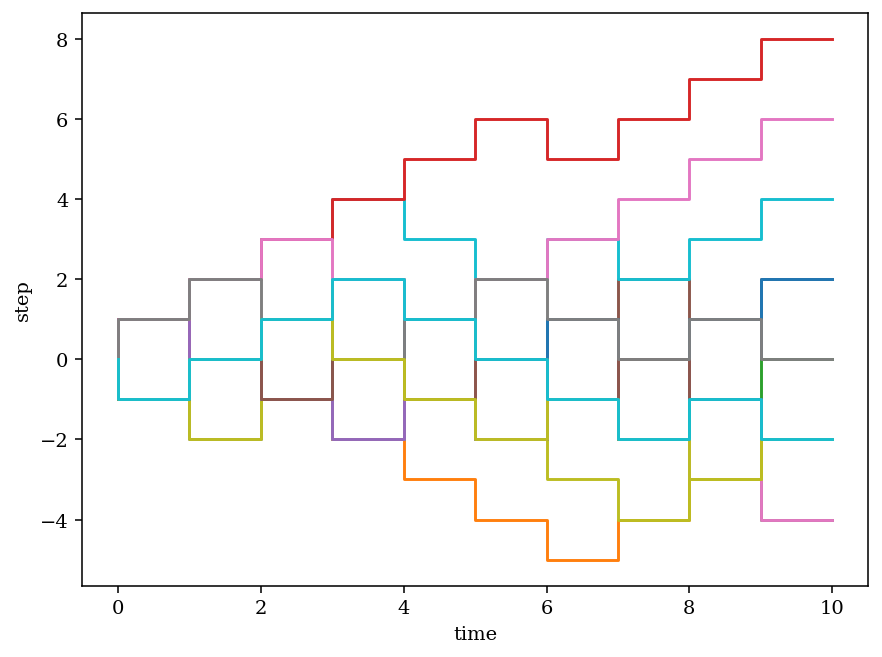

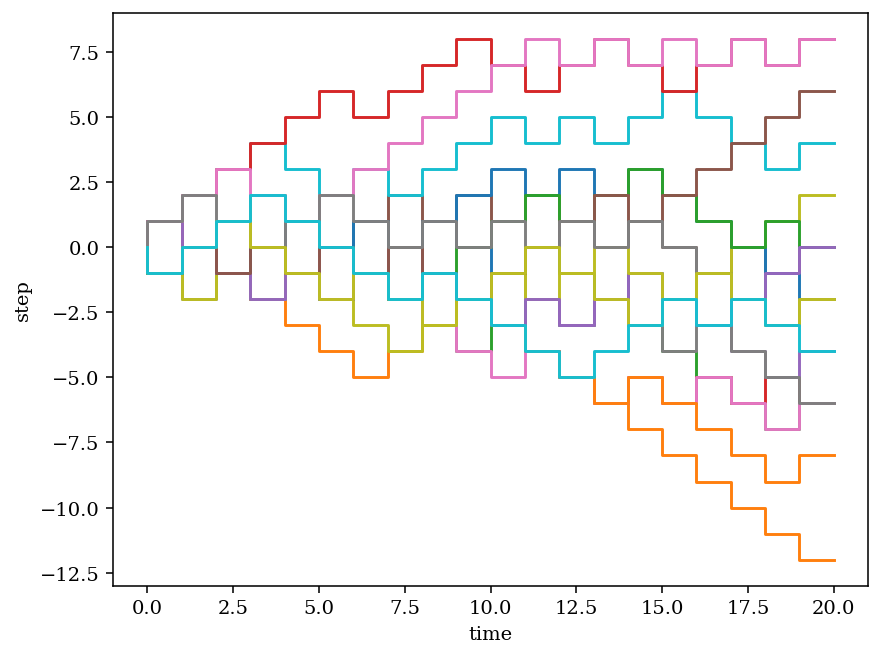

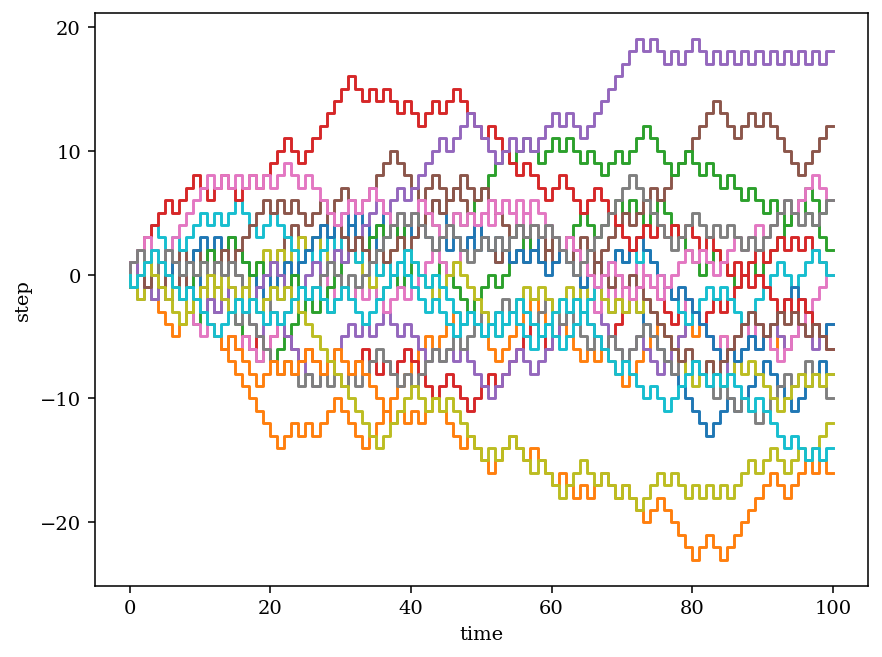

In [6]:
for N in [10,20,100]:
    plt.step(np.arange(N+1),gen_walks(N,20)[1])
    plt.ylabel("step")
    plt.xlabel("time")
    plt.show()

**b)** Check for $N = 10$ and $20$ with $p = 0.5$ and $0.7$ that $N_R$ is distributed according to the binomial distribution. To this end, in
each case about 100 000 random walks should be generated (which
takes on modern PCs only a few seconds computing time).

In [11]:
from scipy.stats import binom


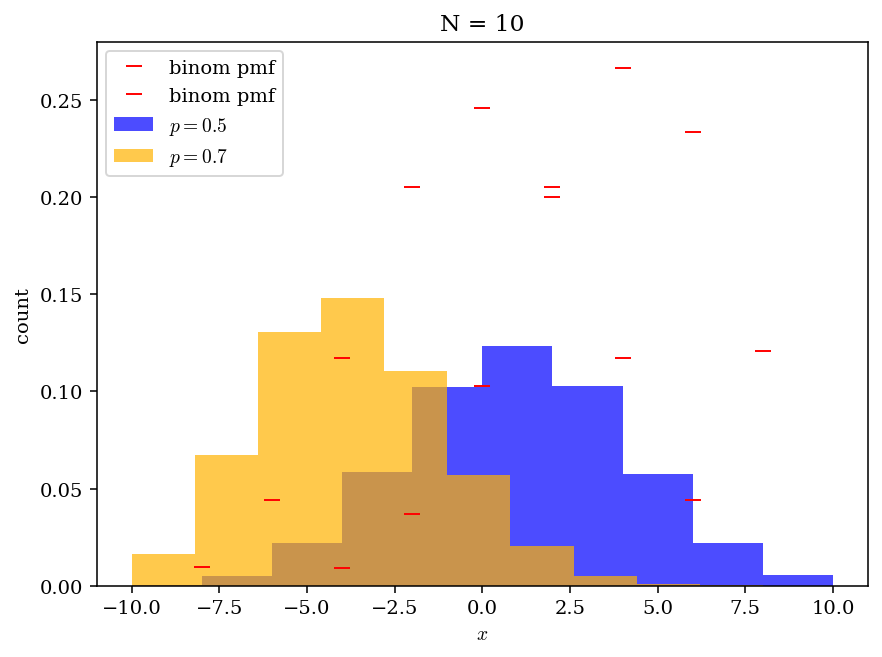

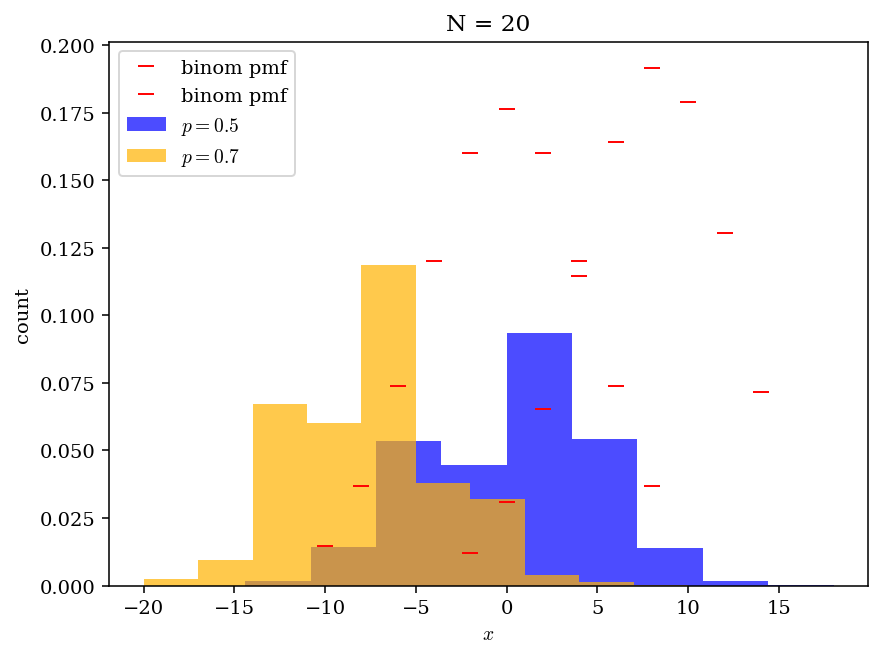

In [20]:
for N in [10,20,100]:
    steps = gen_walks(N,100_000)[1
    ]
    x1 = np.arange(binom.ppf(0.01, N, 0.5),
              binom.ppf(0.99, N, 0.5))
    plt.hist(walks[-1,:], fc=(0, 0, 1, 0.7), label=r"$p = 0.5$", density=True)
    plt.plot(x1*2-N, binom.pmf(x1,N , 0.5), 'r_', ms=8, label='binom pmf')

    x2 = np.arange(binom.ppf(0.01, N, 0.7),
              binom.ppf(0.99, N, 0.7))
    walks2 = gen_walks(N,100_000,p=0.7)
    plt.hist(walks2[-1,:], fc=(1, 0.7, 0, 0.7), label=r"$p = 0.7$", density=True)
    plt.plot(x2*2-N, binom.pmf(x2,N , 0.7), 'r_', ms=8, label='binom pmf')
    

    plt.legend()
    plt.title(f"N = {N}")
    plt.ylabel("count")
    plt.xlabel("$x$")
    plt.show()

**d)** “Play” with your computer program and think about your own
research questions concerning random walks ...